<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.2: Feature Selection

## Load & Explore Data

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Data

In [90]:
# Read CSV
wine_csv = '..\\DATA\\winequality_merged.csv'
df=pd.read_csv(wine_csv)

## Explore Data (Exploratory Data Analysis)

In [91]:
# ANSWER
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [8]:
df.shape

(6497, 13)

In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [24]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [26]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


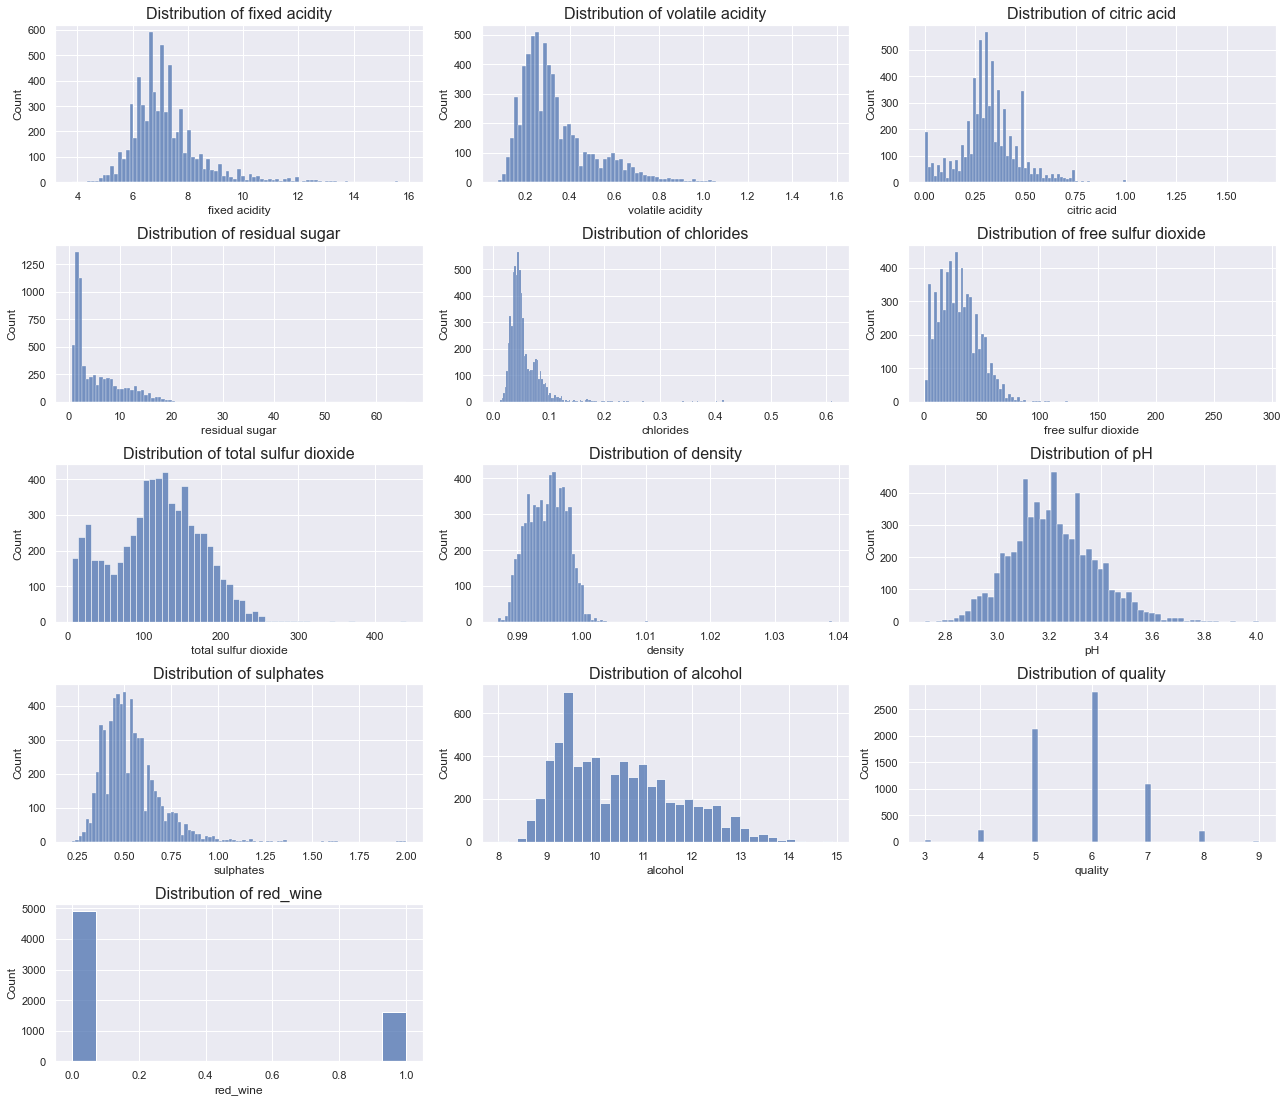

In [157]:
plt.figure(figsize = (18,18))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in df.columns:
    plt.subplot(6,3,num)
    sns.histplot(data=df, x=cols) #hue='red_wine' add into can split the red wine values 1/0 to see difference
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


In [28]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


AttributeError: module 'seaborn' has no attribute 'set_xticklabels'

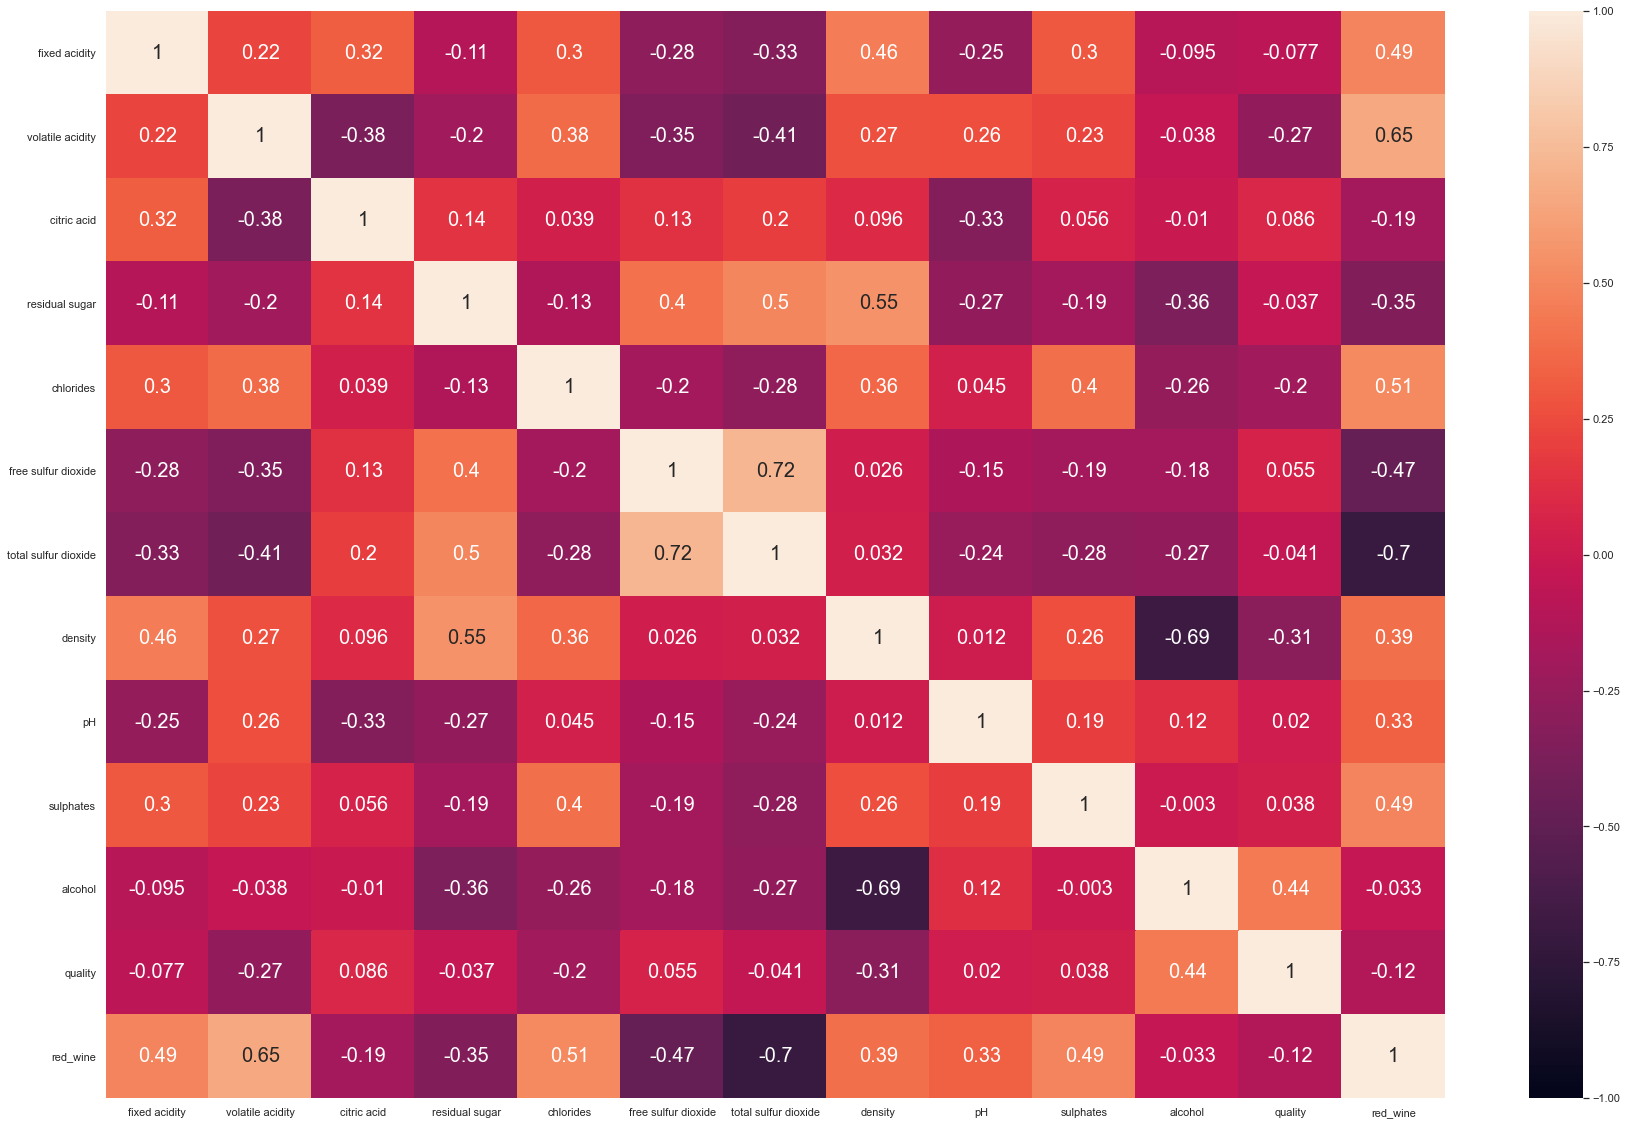

In [50]:
sns.heatmap(df.corr(), vmin=-1,vmax=1,annot=True,annot_kws={"size":20})
sns.set_xticklabels(sns.get_ymajorticklabels(),fontsize=20)

<Figure size 2880x2880 with 0 Axes>

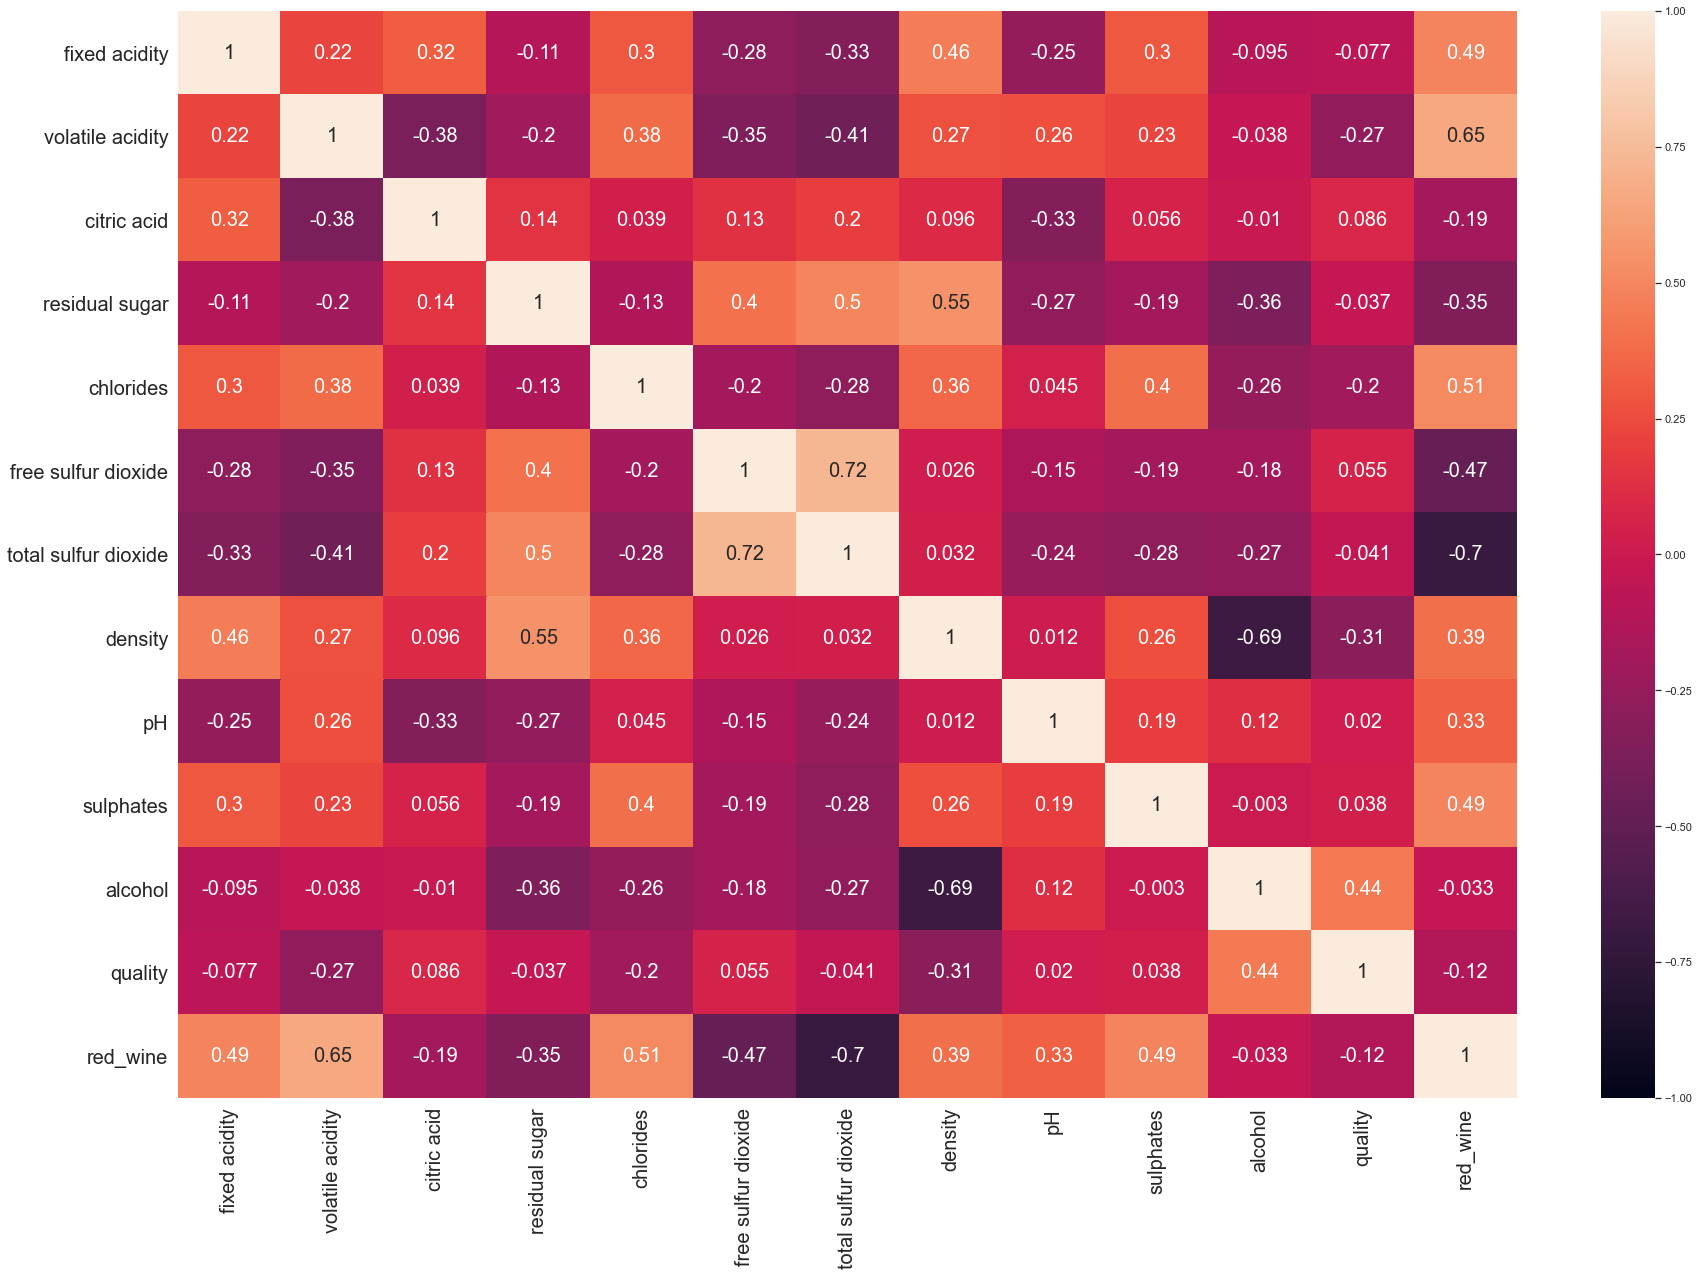

<Figure size 2880x2880 with 0 Axes>

In [155]:
heatmap_plot=sns.heatmap(df.corr(), vmin=-1,vmax=1,annot=True,annot_kws={"size":20})
heatmap_plot.set_xticklabels(heatmap_plot.get_xmajorticklabels(),fontsize=20, rotation=90)
heatmap_plot.set_yticklabels(heatmap_plot.get_ymajorticklabels(),fontsize=20)
plt.figure(figsize = (40,40))

In [159]:
#df.corr().iloc[:,-2].sort_values(ascending=False) # kelvin: pick out the row for easier viewing
df.corr()['quality'].sort_values() #another way, hwee li


density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
red_wine               -0.119323
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [208]:
#ryan
#print(abs(df.corr()['quality'].sort_values().index[-5:-1])


TypeError: bad operand type for abs(): 'str'

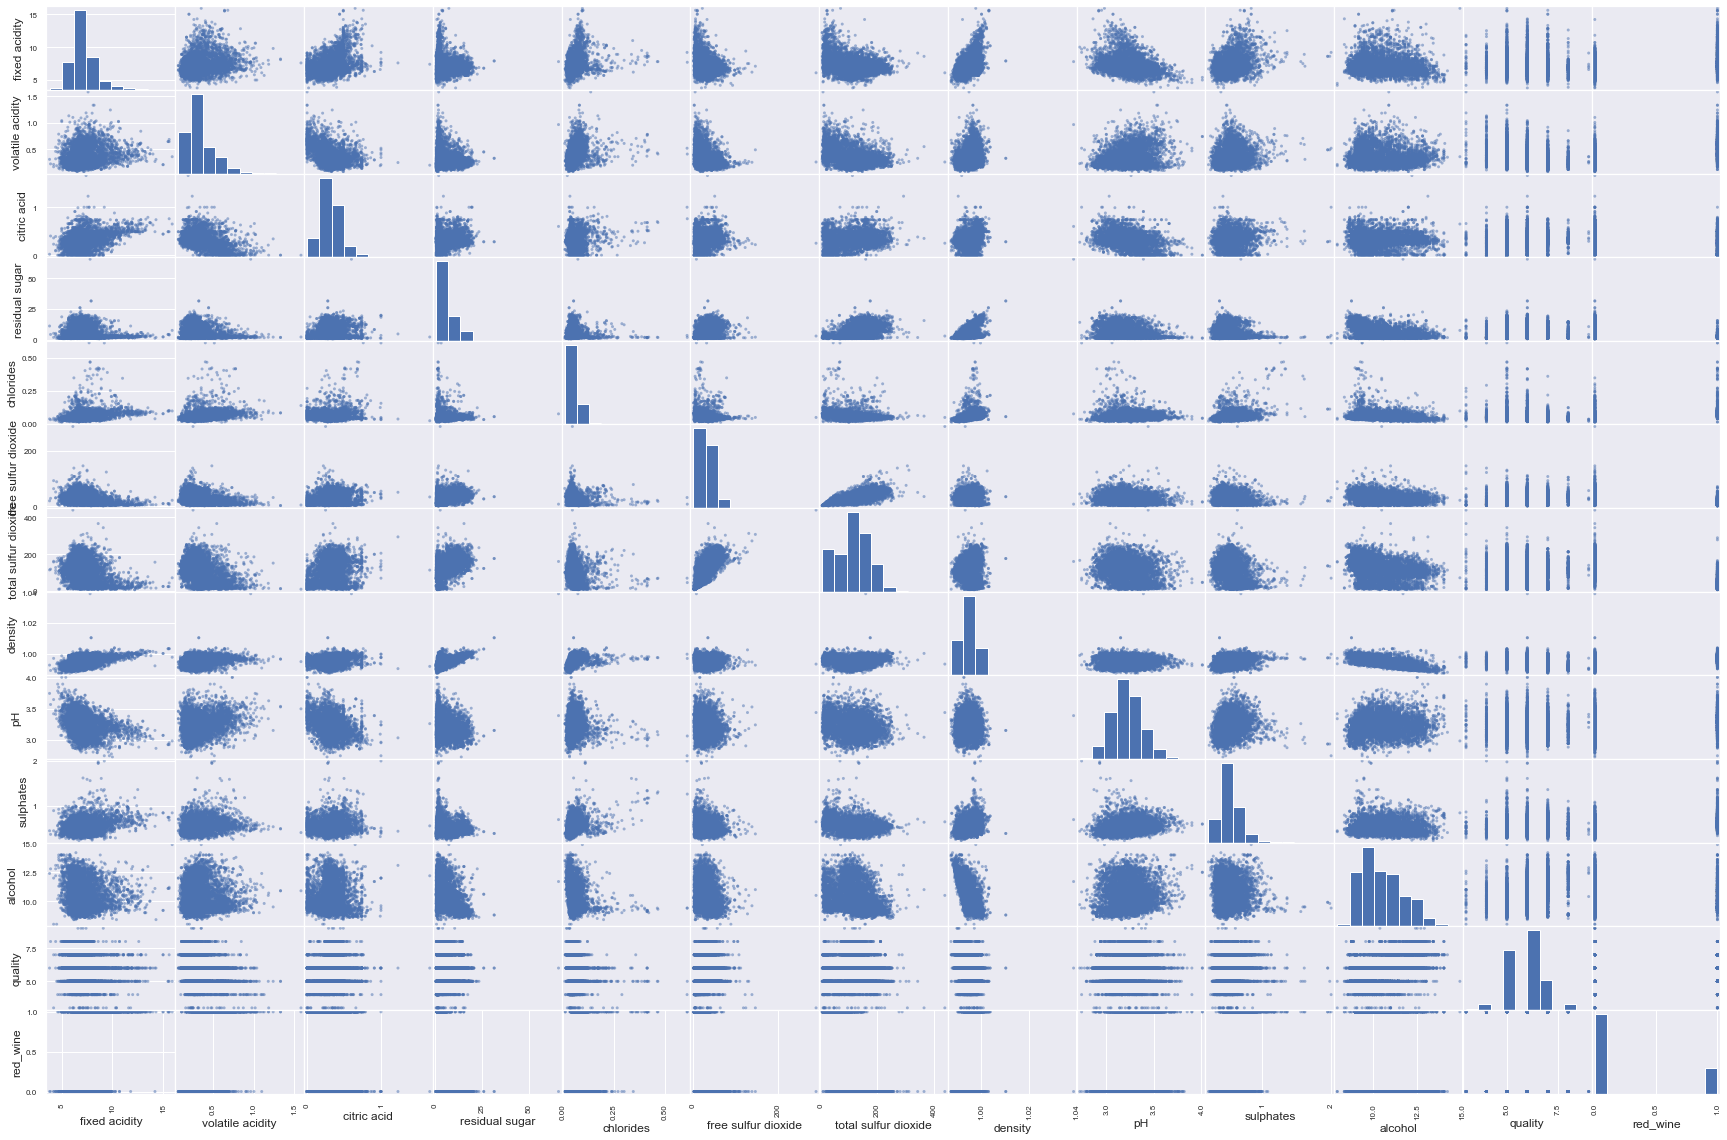

In [156]:
pd.plotting.scatter_matrix(df)
plt.rcParams["figure.figsize"] = [30, 20]

In [69]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [82]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

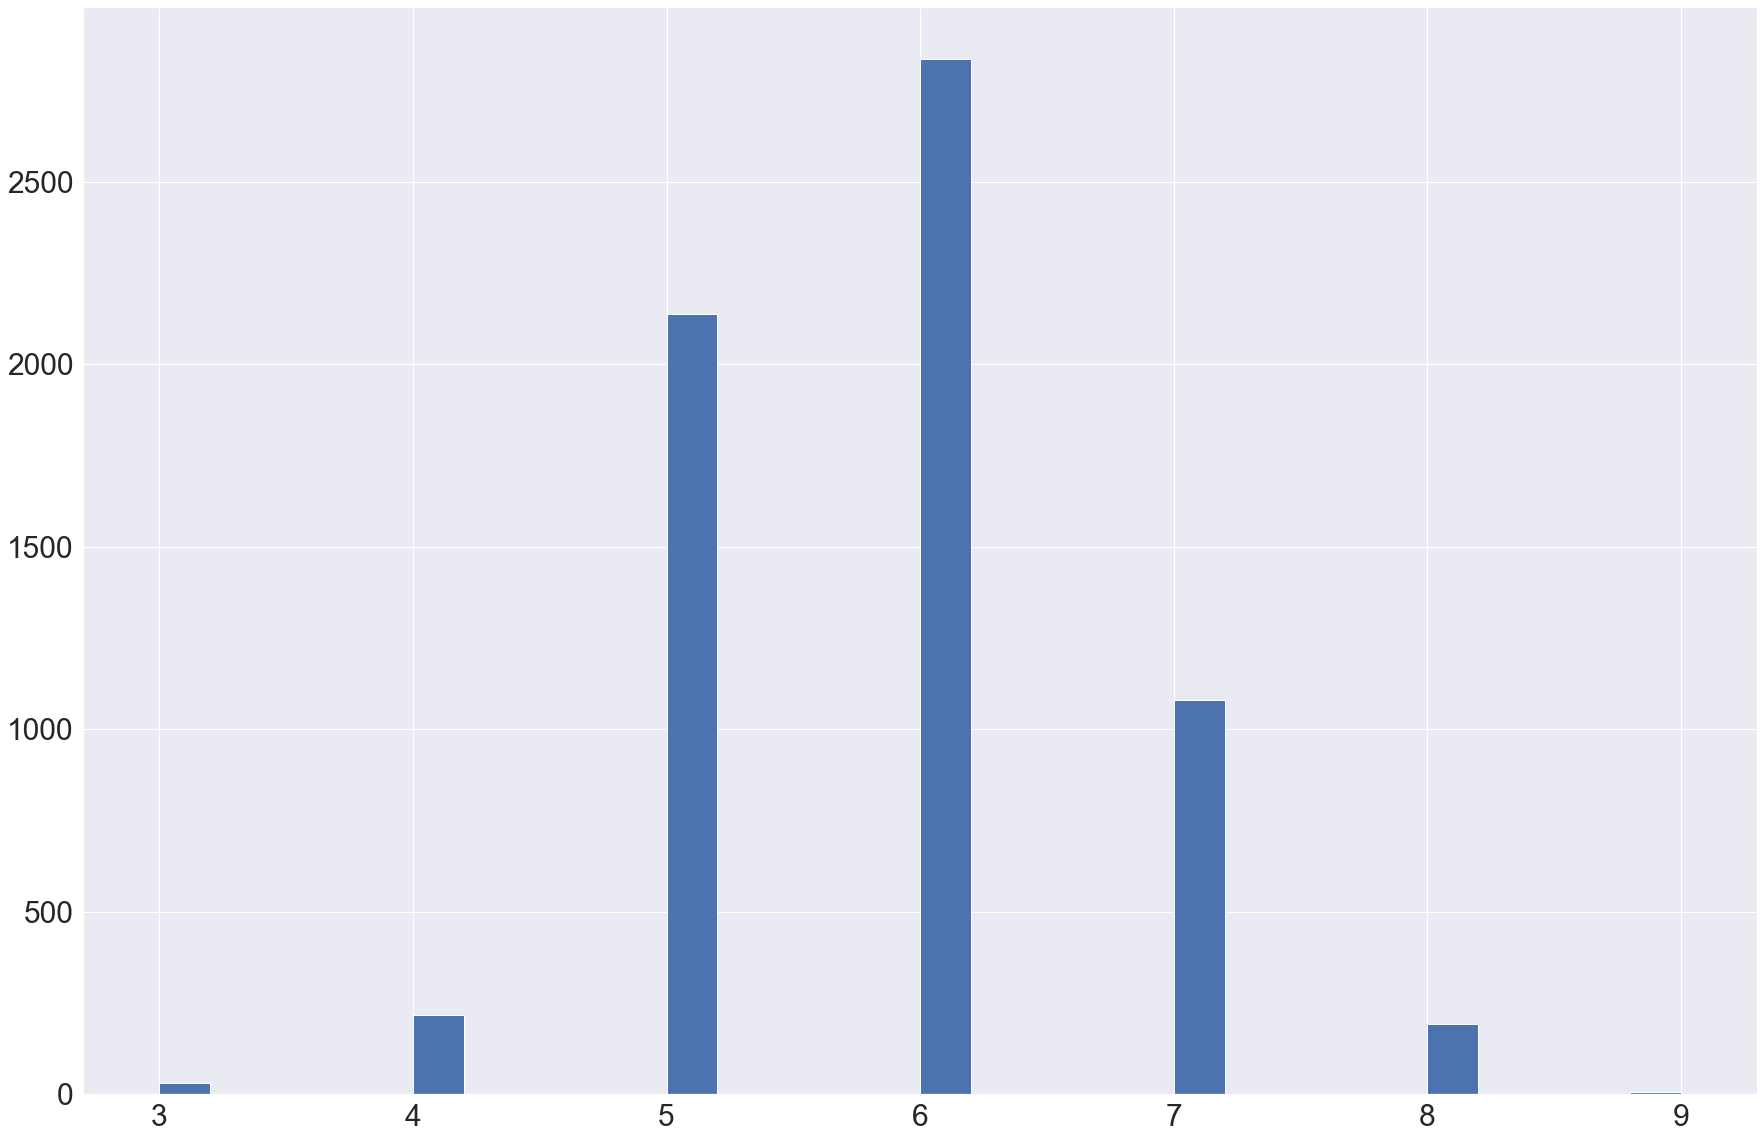

In [81]:
plt.hist(df['quality'],bins=30)
plt.tick_params(axis='both', which='major', labelsize=30)

In [ ]:
#df.drop([index,index],axis=0,inplace=True)

In [ ]:
#make a new  col to do some comparsion
#df['quality_label']=df['quality'].apply(lambda x: 'Good' if x>=6 else 'Bad')

## Set Target Variable

Create a target variable for wine quality.

In [ ]:
#X = Predictor Variable
#Y = Target Variable

In [57]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [104]:
# Target Variable
y=df['quality']

# Set Predictor Variables based on correlation

Create a predictor matrix with variables of your choice. State your reason.

In [160]:
# ANSWER
#alcohol as it is the highest correlation value to quality
X=df[['alcohol','density','volatile acidity','chlorides']]

# Using Linear Regression model

Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [175]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [177]:
y_train.shape

(5197,)

In [164]:
X_train.shape

(5197, 4)

In [179]:
X_train.head()

,alcohol,density,volatile acidity,chlorides
1916,10.5,0.99380,0.240,0.031
947,12.4,0.99408,0.280,0.093
877,11.8,0.99371,0.715,0.064
2927,11.7,0.99020,0.370,0.028
6063,9.3,0.99810,0.260,0.053


In [170]:
# Create a model for Linear Regression
lr = LinearRegression()
#lr.fit(X,y)
#lr.intercept_,lr.coef_

# Fit the model with the Training data
lr.fit(X_train,y_train)
print(lr.intercept_,lr.coef_)

# Calculate the score (R^2 for Regression) for Training Data
R2_training=lr.score(X_train,y_train)
# Calculate the score (R^2 for Regression) for Testing Data
R2_score=lr.score(X_test,y_test)

print(R2_training,R2_score)

-38.39531946161805 [ 0.39187742 40.83297487 -1.51250401 -0.08243747]
0.2707886547599644 0.2521354751304963


In [168]:
lr.predict(X_test) #y values for best fit line

array([6.72089333, 5.16322654, 6.22689531, ..., 6.62762614, 5.44008318,
       5.5355337 ])

# Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

### Overview of the code below

The external `while` loop goes forever until there are no improvements to the model, which is controlled by the flag `changed` (until is **not** changed).
The inner `for` loop goes over each of the features not yet included in the model and calculates the correlation coefficient. If any model improves on the previous best model then the records are updated.

### Code variables
- `included`: list of the features (predictors) that were included in the model; starts empty.
- `excluded`: list of features that have **not** been included in the model; starts as the full list of features.
- `best`: dictionary to keep record of the best model found at any stage; starts 'empty'.
- `model`: object of class LinearRegression, with default values for all parameters.

### Adjusted $R^2$ formula
$$Adjusted \; R^2 = 1 - { (1 - R^2) (n - 1)  \over n - k - 1 }$$

In [121]:
## Flag intermediate output
show_steps = True   # for testing/debugging

In [171]:
len(X_test)

1300

In [174]:
X_test.head()

,alcohol,density,volatile acidity,chlorides
3103,12.2,0.99420,0.17,0.045
1419,9.9,0.99560,0.64,0.077
4761,12.0,0.99212,0.39,0.020
4690,9.5,0.99592,0.28,0.040
4032,8.9,0.99888,0.35,0.054


In [185]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
r2_test=[]
r2_train=[]
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        #included is a list, new column is also a list, when we add them together they combine into a bigger list
        fit = model.fit(X_train[included+[new_column]],y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = model.score(X_test[included+[new_column]],y_test) # calculate the score (using test score)
        
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1-((1-r2)*((n-1))/(n-k-1)) # calculate the Adjusted R^2
        
        
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            r2_test.append(model.score(X_test[included+[new_column]],y_test))
            r2_train.append(model.score(X_train[included+[new_column]],y_train))
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = density, volatile acidity, chlorides, alcohol
(Step) Trying density...
(Step) - Features = density
(Step) - Adjusted R^2: This = 0.102; Best = 0.000
(Step) - New Best!   : Feature = density; R^2 = 0.103; Adjusted R^2 = 0.102
(Step) Trying volatile acidity...
(Step) - Features = volatile acidity
(Step) - Adjusted R^2: This = 0.075; Best = 0.102
(Step) Trying chlorides...
(Step) - Features = chlorides
(Step) - Adjusted R^2: This = 0.053; Best = 0.102
(Step) Trying alcohol...
(Step) - Features = alcohol
(Step) - Adjusted R^2: This = 0.181; Best = 0.102
(Step) - New Best!   : Feature = alcohol; R^2 = 0.182; Adjusted R^2 = 0.181
Added feature alcohol with R^2 = 0.182 and adjusted R^2 = 0.181

(Step) Excluded = density, volatile acidity, chlorides
(Step) Trying density...
(Step) - Features = alcohol, density
(Step) - Adjusted R^2: This = 0.180; Best = 0.181
(Step) Trying volatile acidity...
(Step) - Features = alcohol, volatile acidity
(Step) - Adjusted R^2: This = 0.249; 

In [150]:
len(y_train)

5197

In [189]:
r2_train

[0.09115890025047058,
 0.201095495779963,
 0.26161628758028377,
 0.27078026676393163]

In [190]:
r2_test

[0.10292029606830033,
 0.18158453862144686,
 0.2500272879873039,
 0.2519667708304064]

Text(0, 0.5, 'r2 score')

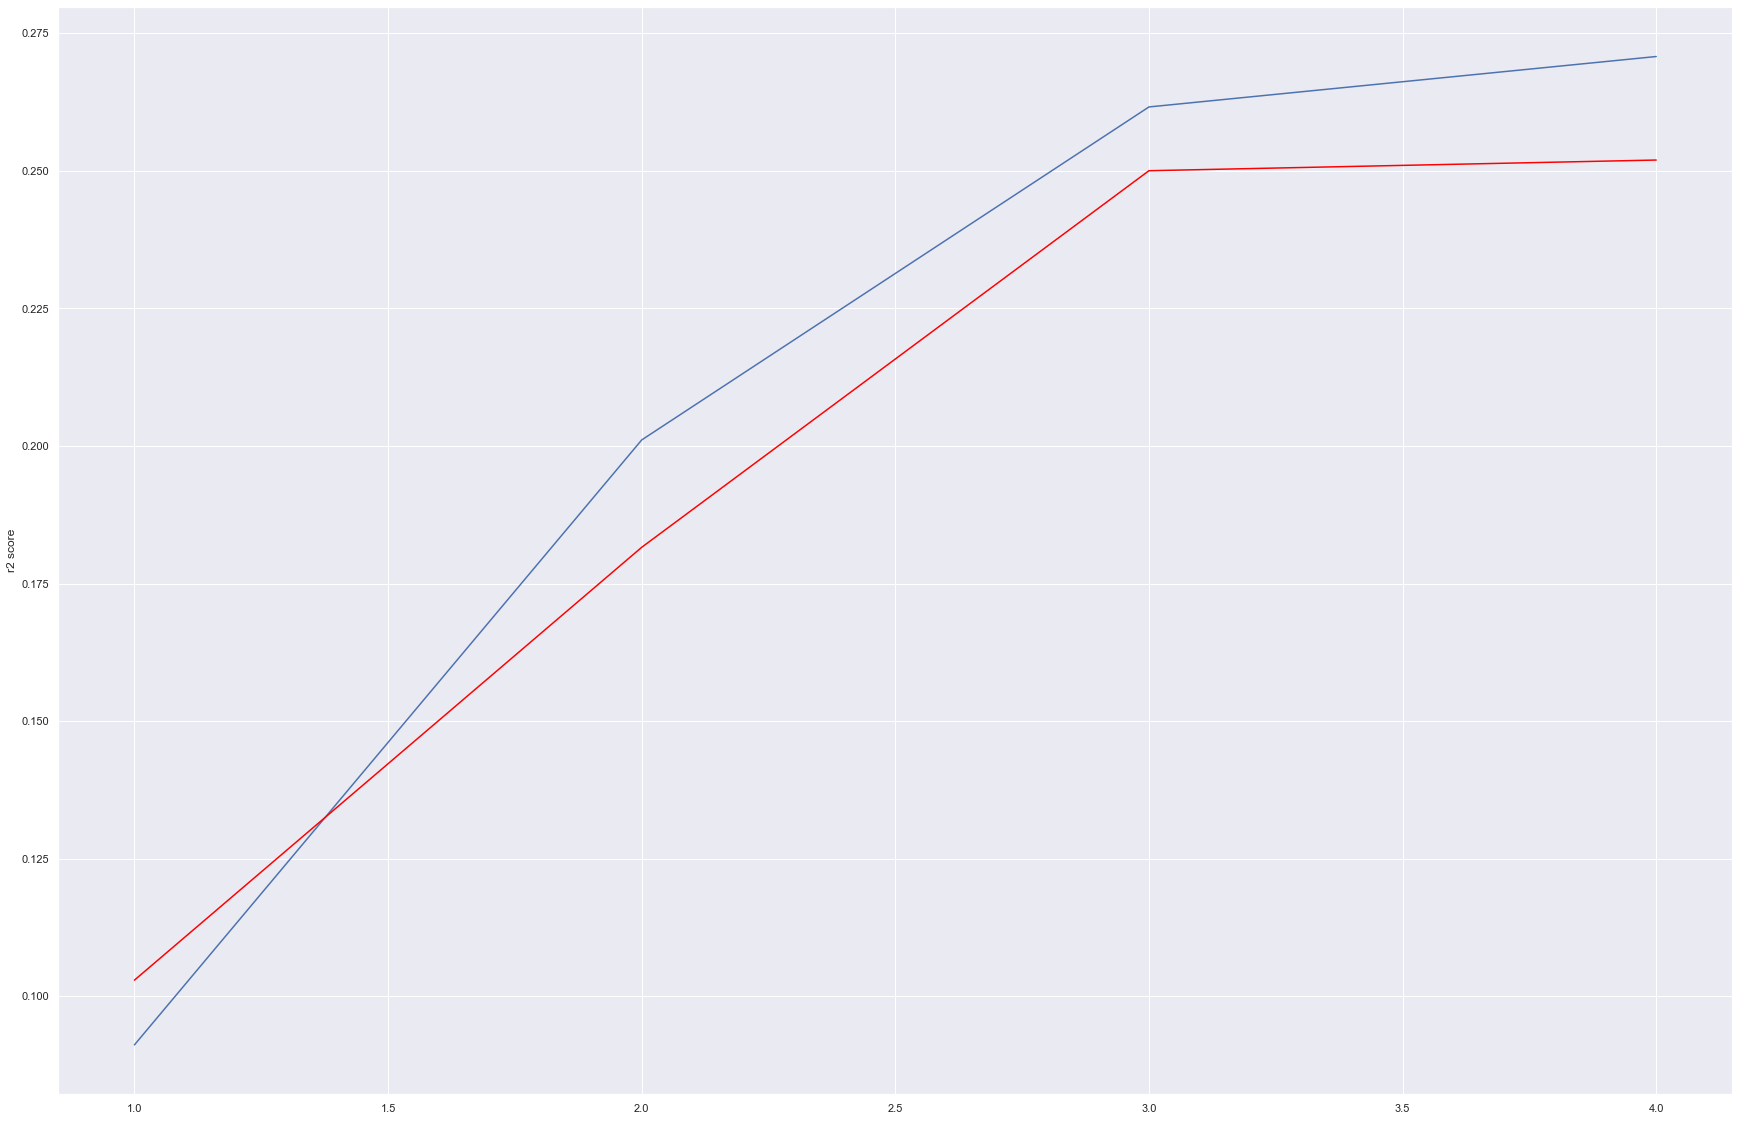

In [201]:
plt.plot(np.arange(1,5),r2_train)
plt.plot(np.arange(1,5),r2_test, color='red')
plt.ylabel('r2 score')

# Cross validation

In [142]:
lr.fit(df[['alcohol']],df['quality'])
lr.intercept_,lr.coef_

(2.4052686015566227, array([0.32531204]))

In [133]:
# Answer
from sklearn.model_selection import cross_validate
cross_validate(fit,df[['alcohol']],df['quality'])

{'fit_time': array([0.00298834, 0.00199199, 0.00359106, 0.00099707, 0.00272393]),
 'score_time': array([0.00099707, 0.0015471 , 0.00099659, 0.0009954 , 0.00199389]),
 'test_score': array([0.19737904, 0.14259664, 0.16402737, 0.25951304, 0.11718204])}

In [202]:
from sklearn.model_selection import cross_val_score

In [203]:
X=df[['alcohol','volatile acidity', 'density']]

cross_val_score(lr,X,y,cv=5)

array([0.27970714, 0.22018   , 0.22473105, 0.29296715, 0.19163239])

In [205]:
# shift tab on the function to see explanation

#markdown can do this # big ## smaller

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
